<a href="https://colab.research.google.com/github/Battleboy-bot/C-DSA-BootCamp/blob/main/Spotify_Songs%E2%80%99_Genre_Segmentation_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
df = pd.read_csv('/content/spotify dataset.csv')


In [12]:
df.isnull().sum()


,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [13]:

df.fillna(0, inplace=True)


df.isnull().sum()


,0
track_id,0
track_name,0
track_artist,0
track_popularity,0
track_album_id,0
track_album_name,0
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [14]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


numeric_features = df.select_dtypes(include=['float64', 'int64']).columns


df[numeric_features] = scaler.fit_transform(df[numeric_features])


df.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.545455,0.918090,1.0,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,0.371254
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,0.67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.000000,0.869162,1.0,0.040632,0.072837,0.004235,0.358434,0.699294,0.417524,0.308674
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,0.70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.090909,0.901368,0.0,0.080828,0.079879,0.000023,0.110442,0.618567,0.517908,0.335953
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.636364,0.894118,1.0,0.111111,0.028873,0.000009,0.204819,0.279516,0.509338,0.321311
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.090909,0.875385,1.0,0.039107,0.080785,0.000000,0.083635,0.731584,0.517775,0.360156


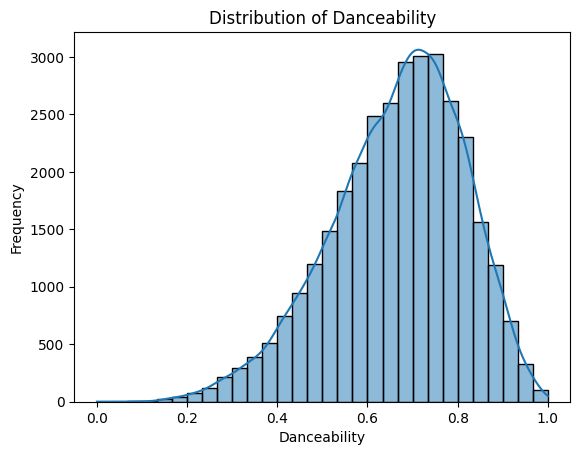

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df['danceability'], bins=30, kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()


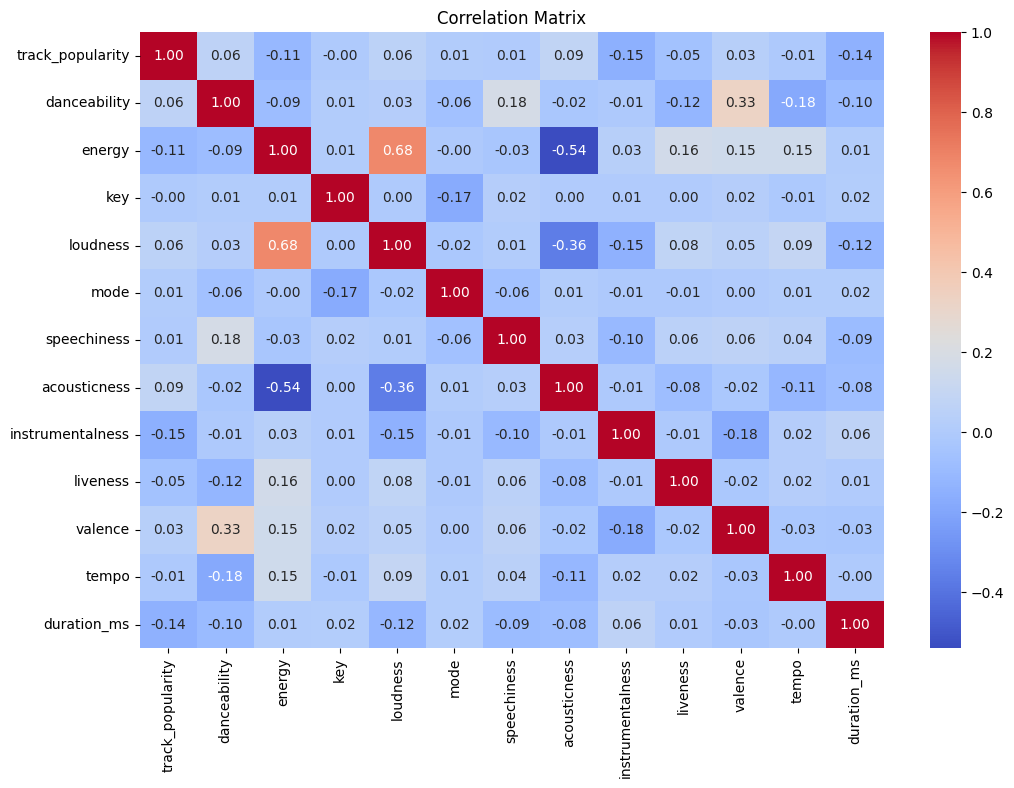

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [18]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df[numeric_features])
df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.918090,1.0,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,0.371254,2
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,0.67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.869162,1.0,0.040632,0.072837,0.004235,0.358434,0.699294,0.417524,0.308674,2
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,0.70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.901368,0.0,0.080828,0.079879,0.000023,0.110442,0.618567,0.517908,0.335953,0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.894118,1.0,0.111111,0.028873,0.000009,0.204819,0.279516,0.509338,0.321311,2
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.875385,1.0,0.039107,0.080785,0.000000,0.083635,0.731584,0.517775,0.360156,1


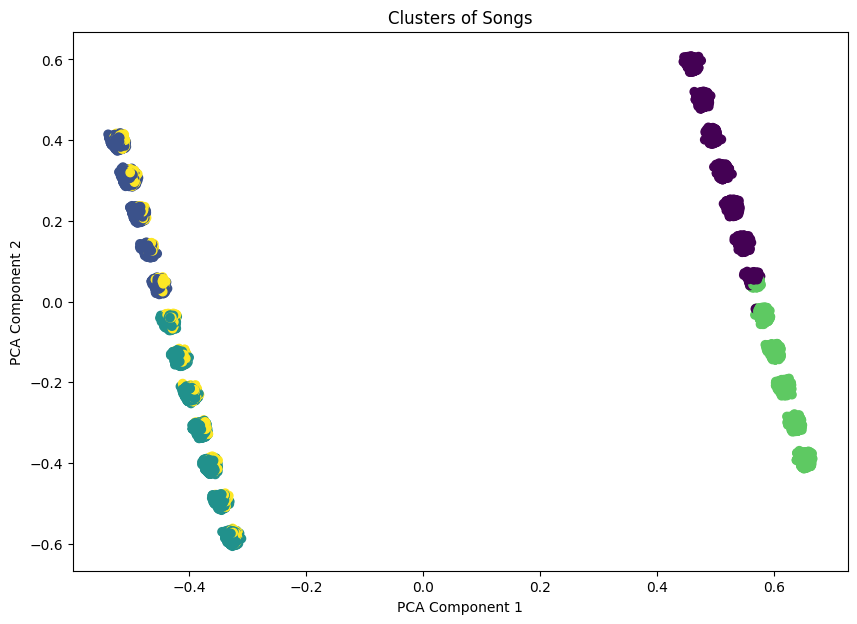

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[numeric_features])


plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Clusters of Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
